<a href="https://colab.research.google.com/github/redjules/multilinear-regression/blob/main/Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, directory and data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [3]:
#libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [4]:
#load the data
df = pd.read_csv("salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Analysing the data

In [5]:
#Summary statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


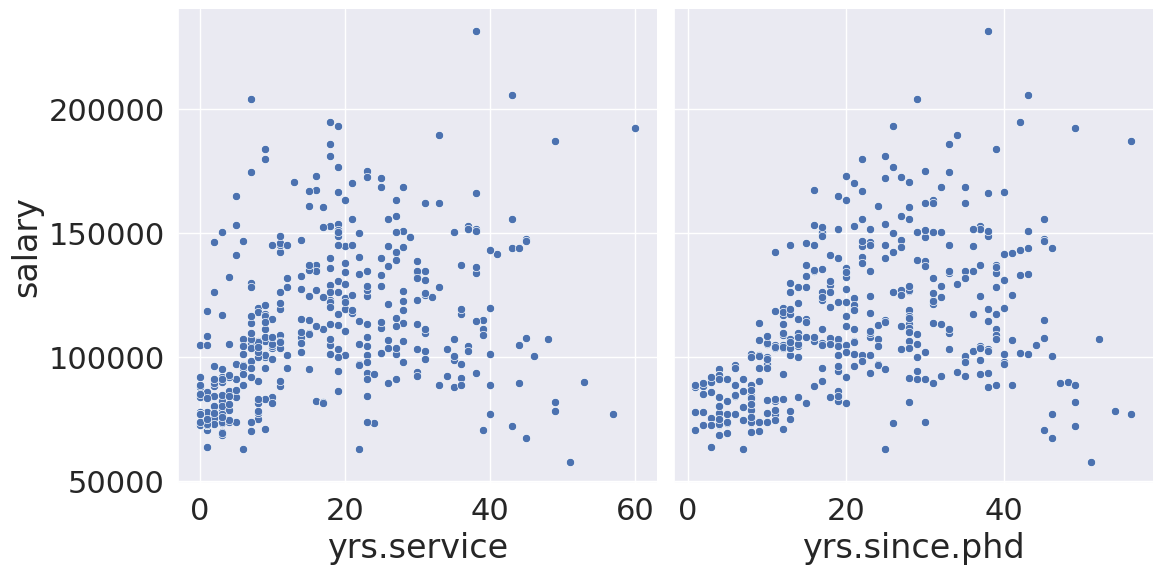

In [11]:
# plotting continuous IV against dependent variable 
sns.set(font_scale = 2)
sns.pairplot(data = df,
             y_vars = ['salary'],
             x_vars = ['yrs.service','yrs.since.phd'],
             height = 6)

<ipython-input-12-c685617de1c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

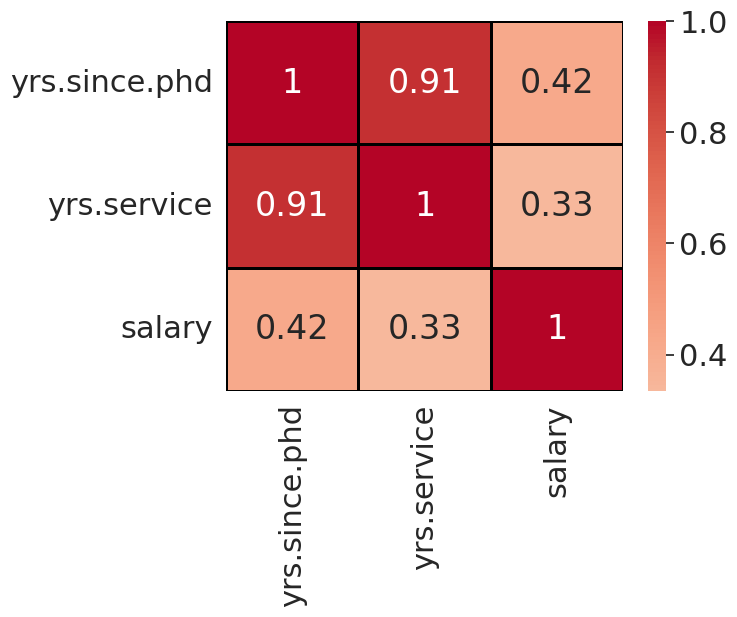

In [12]:
# Correlation matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

In [15]:
# Categorical variables
df['rank'].value_counts()
df.select_dtypes(include='object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [18]:
# For loop categorical variables
categorical = list(df.select_dtypes(include = 'object'))
for cat in categorical:
  print(df[cat].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [19]:
# look at dataset
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [20]:
#transform objects into dummies
df = pd.get_dummies(data = df, drop_first = True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


# Multinear regression preparation

In [23]:
# isolate X and Y
y = df.salary / 1000
X = df.drop(columns = ['salary','yrs.service'])
X.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [24]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


In [26]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1502)
X_train.head(2)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1


# Multilinear Regression

In [27]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.65e-41
Time:                        11:05:07   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

R-squared = 0.475 used when we have 1 independent variable but we have more, then we use Adj. R-squared = 0.466 -> we can only explain 47% of the variance. Not great but not bad for the first attempt. The model tells you which variables odn't add a lot of value (not important)
yrs.since.phd is statistically insignificant (p=0.833), we could remove this coef
sex_Male is also statistically insignificant (p=0.211). Male 5356 more than women.
rank_prof (if someone is a professor) earn 34765 more, is statiscally significant



# Accuracy Assessment

In [30]:
#Predict
predictions = model.predict(X_test)
predictions[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [31]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 18.2
RMSE: 25.8


# Multilinear Regression Challenge

# Directory, Libraries and Data

In [32]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [33]:
#libraries
import pandas as pd
import statsmodels.api as su
import numpy as np
import seaborn as sns

In [34]:
#Loading the data
df = pd.read_csv("Clothing.csv")
df.head()


,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [35]:
#picking variables
df = df[["tsales","margin","nown","inv1","inv2","ssize","start"]]
df.head(1)

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0


# data analysis

In [36]:
# Summary statistics
df.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


<Axes: >

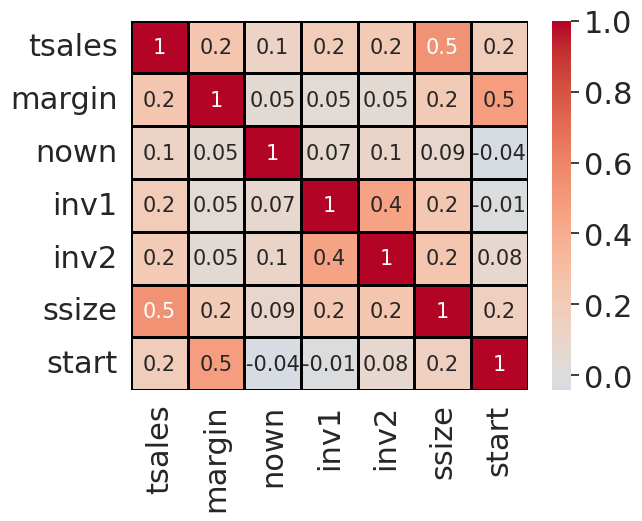

In [56]:
#Correlation Matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center=0,
            cmap="coolwarm",
            linewidths =1,
            linecolor= 'black',
            annot_kws={"size":15})

#Multilinear Regression prep

In [45]:
#Prepare X and Y
y = df.tsales
X = df.drop(columns=["tsales"])
X = sm.add_constant(X)

In [ ]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Multilinear Regression

In [47]:
#Regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.65e-41
Time:                        11:54:38   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

In [49]:
#predictions
predictions = model.predict(X_test)
predictions[:2]

364    118.590061
30     134.868270
dtype: float64

In [54]:
#accuracy assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE:", round(mean_absolute_error(y_test,predictions),0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)),0))

MAE: 18.0
RMSE: 26.0
